In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os


In [55]:
def openFile():
    url = "/Users/nitin/Desktop/FILES/AdventrueOfSherlockHolmes.txt"
    
    file = open(url, "r", encoding = "utf8")

    # store file in list
    lines = []
    for i in file:
        lines.append(i)

    # Convert list to string
    data = ""
    for i in lines:
      data = ' '. join(lines) 

    #replace unnecessary stuff with space
    data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

    #remove unnecessary spaces 
    data = data.split()
    data = ' '.join(data)
    
    return data

    


In [56]:
#Tokenization: Tokenization refers to splitting bigger text data, essays, or corpus’s into smaller segments. 
#These smaller segments can be in the form of smaller documents or lines of text data.
#They can also be a dictionary of words.

In [63]:
def runTokenization(data):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts([data])

    # saving the tokenizer for predict function
    pickle.dump(tokenizer, open('token.pkl', 'wb'))
    
    sequence_data = tokenizer.texts_to_sequences([data])[0]
    sequence_data[:15]

    vocab_size = len(tokenizer.word_index) + 1
    print(vocab_size)
    
    
    sequences = []

    for i in range(3, len(sequence_data)):
        words = sequence_data[i-3:i+1]
        sequences.append(words)

    print("The Length of sequences are: ", len(sequences))
    sequences = np.array(sequences)
    sequences[:10]


    
    X = []
    y = []

    for i in sequences:
        X.append(i[0:3])
        y.append(i[3])

    X = np.array(X)
    y = np.array(y)
    
    
    
    print("Data: ", X[:10])
    print("Response: ", y[:10])
    
    
    y = to_categorical(y, num_classes=vocab_size)
    y[:5]
    
    return vocab_size, X, y


# Model


In [64]:
def myModel(vocab_size):
    
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=3))
    model.add(LSTM(1000, return_sequences=True))
    model.add(LSTM(1000))
    model.add(Dense(1000, activation="relu"))
    model.add(Dense(vocab_size, activation="softmax"))
    
    model.summary()
    
    return model

#  Plot Model

In [100]:
def plotModel(model, X, y):
    
    keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)
    checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
    model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=['acc'])
    history = model.fit(X, y, epochs=70, batch_size=64).history
    
    
    model.save('/Users/nitin/Desktop/next_words.h5')
    
    return history

# Calling function 

In [101]:
data = openFile()

vocab_size, X, y = runTokenization(data)


8606
The Length of sequences are:  108904
Data:  [[   1  141  130]
 [ 141  130  857]
 [ 130  857    5]
 [ 857    5    1]
 [   5    1 1060]
 [   1 1060    5]
 [1060    5  127]
 [   5  127   33]
 [ 127   33   46]
 [  33   46  590]]
Response:  [ 857    5    1 1060    5  127   33   46  590 2585]


# Run model and plotModel function

In [102]:
model = myModel(vocab_size)

history = plotModel(model, X, y)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 3, 10)             86060     
                                                                 
 lstm_30 (LSTM)              (None, 3, 1000)           4044000   
                                                                 
 lstm_31 (LSTM)              (None, 1000)              8004000   
                                                                 
 dense_30 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_31 (Dense)            (None, 8606)              8614606   
                                                                 
Total params: 21,749,666
Trainable params: 21,749,666
Non-trainable params: 0
_________________________________________________________________
('You must install pydot (`pip install py

KeyboardInterrupt: 

# Evaluating the model

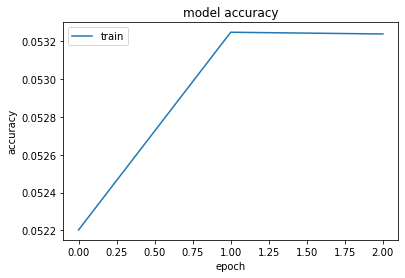

In [88]:
# Model accuracy graph


plt.plot(history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')



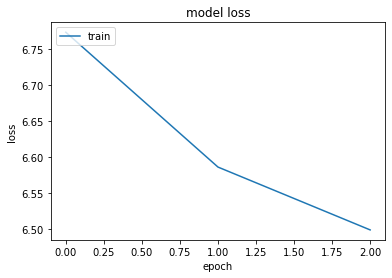

In [87]:
# model loss graph


plt.plot(history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


# Load Model and tokenizer

In [93]:
# Load the model and tokenizer

def loadModel():
    model = keras.models.load_model('/Users/nitin/Desktop/next_words.h5')
    tokenizer = pickle.load(open('token.pkl', 'rb'))
    
    return model, tokenizer
    

In [92]:
def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word


# Calling loadModel and predict function

In [103]:
# model, tokenizer = loadModel()


# while(True):
#   text = input("Enter your line: ")
  
#   if text == "0":
#       print("Execution completed.....")
#       break
  
#   else:
#       try:
#           text = text.split(" ")
#           text = text[-3:]
#           print(text)
        
#           Predict_Next_Words(model, tokenizer, text)
          
#       except Exception as e:
#         print("Error occurred: ",e)
#         continue


Enter your line: how can you abuse your own
['abuse', 'your', 'own']
the


KeyboardInterrupt: Interrupted by user